## Extract Sphere SAXS curve from GSD file (PyTorch)

##### Initialize sasintensity instance

In [1]:
#import necessary modules
import sys
sys.path.append('../gsd2sas')
import os
import numpy as np
import matplotlib.pyplot as plt
from sasintensity import SphereIntensity
import torch
from structurefactor import StructureFactor
import matplotlib.ticker as ticker

In [2]:
# Create an instance of the SphereIntensity class, corresponding to SAXS curve of spheres
# SLD of samples and solvent can be found in literature
au = SphereIntensity(volume_fraction=0.01, sld_sample=118e-6, sld_solvent=9.44e-6)

In [3]:
# Initialize form factor, unit is simulation unit.
au.set_form_factor(radius=1)

# Initialize structure factor, which requises the gsd file, N_grid, and what frames to extract. Default is the last 5 frames.
gsd = '/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/N8000.0_phi0.010_epsd7.10_delta0.25_epsY0.27_lamb4.28.gsd'
N_grid = 300
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
au.set_structure_factor(gsd_path=gsd, N_grid=N_grid, device=device)


Total frames extracted: 101


##### Compute Structure Factor(Optional)

In [4]:
q, s = au.structure_factor.compute_s_1d()

Total frames processed: 5


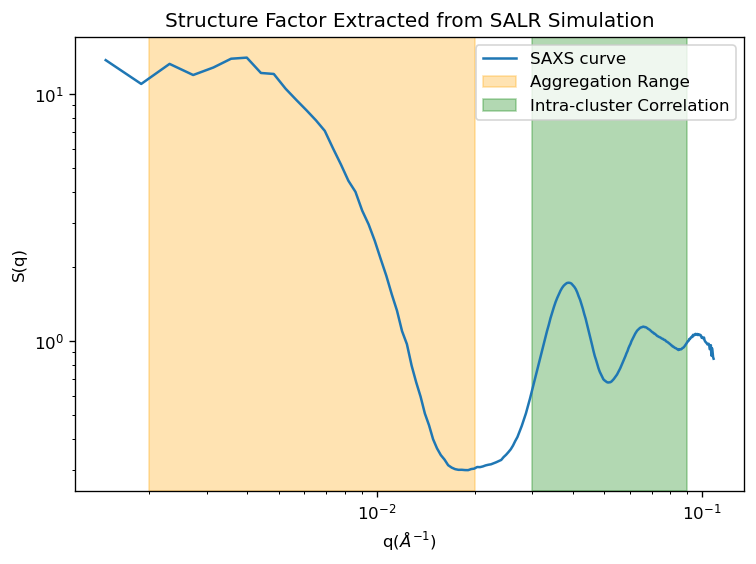

In [5]:
# the first bin of q&s need to be removed
plt.figure(dpi=120)
plt.loglog(q[3:-1]/100, s[3:-1], label = "SAXS curve")
plt.xlabel('q($\AA^{-1}$)')
plt.ylabel('S(q)')
plt.title('Structure Factor Extracted from SALR Simulation')
# Add shaded region for aggregation (low q)
plt.axvspan(0.002, 0.02, color='orange', alpha=0.3, label='Aggregation Range')

# Add shaded region for intra-aggregate interactions (higher q)
plt.axvspan(0.03, 0.09, color='green', alpha=0.3, label='Intra-cluster Correlation')
plt.legend()
plt.tight_layout()

#### Compute Form Factor(Optional)

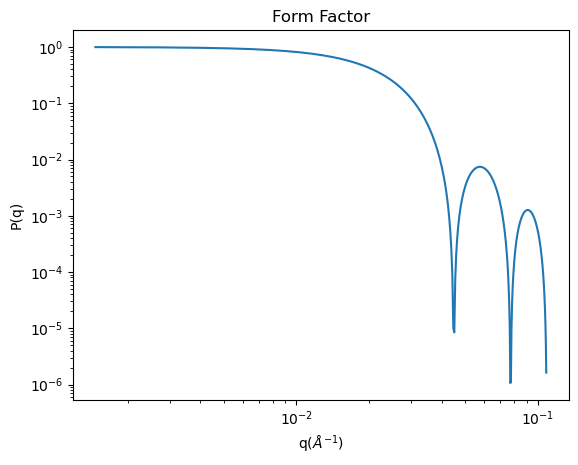

In [6]:
# Form factor of sphere is analytic, the input needs to match the one from structure factor.
p = au.form_factor.Compute_Pq(q)
plt.loglog(q[3:-1]/100,p[3:-1])
#plt.ylim(10e-1000, 5)
plt.xlabel('q($\AA^{-1}$)')
plt.ylabel('P(q)')
plt.title('Form Factor')
plt.yscale('log')

##### Compute Iq and plot

In [7]:
q, Iq = au.compute_Iq()

Total frames processed: 5


Text(0.5, 1.0, 'SAXS Curve Extracted from CG Simulation')

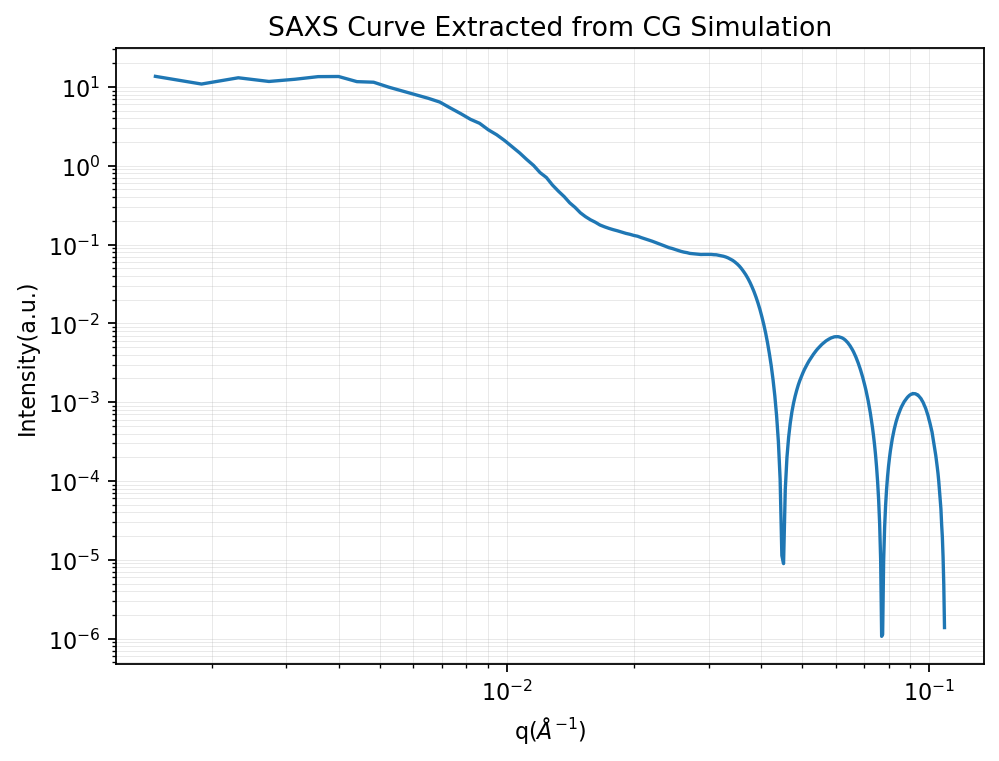

In [8]:
plt.figure(figsize=(7, 5), dpi=160)
plt.loglog(q[3:-1]/100, s[3:-1]*p[3:-1])
plt.xlabel('q($\AA^{-1}$)')
plt.grid(True, which='both', linewidth=0.3, alpha=0.4)
plt.ylabel('Intensity(a.u.)')
plt.title('SAXS Curve Extracted from CG Simulation')